# Exploring the WCWH Ambassador Family Beacon IAQ Data
(See [GH repo](https://github.com/intelligent-environments-lab/utx000))

# Summary
This notebook helps look at the measurements taken during the study period for the various sensors on the beacons.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# Package Import

In [2]:
import sys
sys.path.append('../')

from src.visualization import visualize
from src.data import wcwh
from src.exploration import beacon_summary

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 200)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

from datetime import datetime, timedelta

# Table of Contents
1. [Notes on Analysis and References](#refs)
2. [Data Notes and Import](#import)
3. [Operation and Available Data](#operation)
4. [Aggregated Summary](#aggregated)
5. [Participant Based](#pt-based)

---

<a id="refs"></a>

# Notes on Analysis and References
The analyses in this notebook are primarily surface-level, but are described briefly below.

## References
Some of the references used for analysis as well as for programming.

### Programming
1. [How to Replace Negative Numbers with 0](https://stackoverflow.com/questions/27759084/how-to-replace-negative-numbers-in-pandas-data-frame-by-zero/27759140): For corrected beacon data that corrected values to negatives.
2. [Add Missing Dates to DataFrame Index](https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe): To fill in missing timestamps when the beacon would have gone offline so we can accurately understand reliability.

---

<a id="import"></a>

# Data Notes and Import
Some notes on the data we use and then importing the actual data to look at.

## WCWH Ambassador Families
The ambassador families represent those that signed on for a beta test of all our protocol including the BEVO Beacon. The following devices were included in the rollout:

```python
beacon_list = [1,5,15,16,24,25,29,30,34,36,38,44]
```

## TEST IMPORT

<div class="alert alert-block alert-info">
 
Testing the functionality of the beacon data import class for the WCWH pilot family era.
    
</div>

In [7]:
test_import = wcwh.wcwh(study="wcwh_pilot",suffix="wcwh_s21",data_dir="../data",
                        beacon_list = [1,5,15,16,24,25,29,30,34,36,38,44],
                        verbose=2,start_time=datetime(2022,1,1),end_time=datetime(2022,3,24))
test_import.process_beacon(extreme="zscore",resample_rate=5,retain_negative=True,
                           columns_to_leave_raw=["temperature_c"])

	Processing beacon data...

		Reading for beacon:
		01
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe


			Correcting pm10_mass
			Correcting co
			Correcting pm1_mass
			Correcting tvoc
			Correcting pm2p5_mass
			Correcting co2
			Retaining negative values
			Retaining NaN values
		05
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column e

			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe

			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe

			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in datafr

			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in datafr

			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column Visible in dataframe
			No column visible-unitless in dataframe
			No column Infrared in dataframe
			No column infrared-unitless in datafr

			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe
			No column visible-unitless in dataframe
			No column infrared-unitless in dataframe
			No column equivalent_carbon_dioxide-ppm in dataframe

True

In [8]:
test_import.beacon_data.head()

,co,co2,lux,no2,pm1_mass,pm10_mass,pm2p5_mass,pm4_mass,pm0p5_number,pm1_number,pm10_number,pm2p5_number,pm4_number,internal_rh,tvoc,internal_temp,temperature_c,rh,beacon
timestamp,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,11.648964,1457.147909,2.04,-29.96,0.625453,1.282955,16.923892,13.081067,24.981792,35.728221,40.903564,40.005498,40.758294,44.887517,7.921235,24.428460,22.5,48.50,1
2022-01-01 00:05:00,11.753448,1482.054800,2.04,-26.72,0.671490,1.181636,16.230204,12.250999,29.817547,40.137845,44.494982,43.745182,44.372535,45.040487,12.153660,24.653033,22.5,48.50,1
2022-01-01 00:10:00,11.226929,1409.484213,2.04,-31.40,0.701639,0.994172,14.113710,10.667167,34.289622,43.607411,46.766059,46.231568,46.677084,44.439341,4.698380,24.625707,22.5,47.64,1
2022-01-01 00:15:00,11.152361,1427.755129,2.04,-31.12,0.686569,0.641855,9.050153,7.627933,36.861029,44.015666,45.332980,45.126210,45.295504,44.105530,7.921235,24.643954,22.5,47.50,1
2022-01-01 00:20:00,11.358742,1415.480250,2.04,-27.72,0.683128,1.084458,15.072630,11.426483,31.811229,41.596317,45.355049,44.712582,45.249320,44.491018,5.358483,24.644221,22.5,48.20,1


<div class="alert alert-block alert-success">
 
Looks like, at least at this time, that the `wcwh` class is able to successfully import and clean the beacon data from the devices out in the field.
    
This process needs to be incorporated in the `make_dataset.py` script.
    
</div>

## Complete Beacon
The complete set of beacon data represented by the object `beacon`

In [9]:
beacon = beacon_summary.Summarize(study="wcwh_pilot",suffix="wcwh_s21",data_dir="../data/")
beacon.data.head()

,co,co2,lux,no2,pm1_mass,pm10_mass,pm2p5_mass,pm4_mass,pm0p5_number,pm1_number,pm10_number,pm2p5_number,pm4_number,internal_rh,tvoc,internal_temp,temperature_c,rh,beacon
timestamp,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,11.648964,1457.147909,2.04,-29.96,0.625453,1.282955,16.923892,13.081067,24.981792,35.728221,40.903564,40.005498,40.758294,44.887517,7.921235,24.428460,22.5,48.50,1
2022-01-01 00:05:00,11.753448,1482.054800,2.04,-26.72,0.671490,1.181636,16.230204,12.250999,29.817547,40.137845,44.494982,43.745182,44.372535,45.040487,12.153660,24.653033,22.5,48.50,1
2022-01-01 00:10:00,11.226929,1409.484213,2.04,-31.40,0.701639,0.994172,14.113710,10.667167,34.289622,43.607411,46.766059,46.231568,46.677084,44.439341,4.698380,24.625707,22.5,47.64,1
2022-01-01 00:15:00,11.152361,1427.755129,2.04,-31.12,0.686569,0.641855,9.050153,7.627933,36.861029,44.015666,45.332980,45.126210,45.295504,44.105530,7.921235,24.643954,22.5,47.50,1
2022-01-01 00:20:00,11.358742,1415.480250,2.04,-27.72,0.683128,1.084458,15.072630,11.426483,31.811229,41.596317,45.355049,44.712582,45.249320,44.491018,5.358483,24.644221,22.5,48.20,1


---

<a id="operation"></a>

# Operation/Reliability and Available Data
A look at how reliably the beacons have be monitoring the space and what data are available.

## Sensor Operation
Operation break-down by sensor

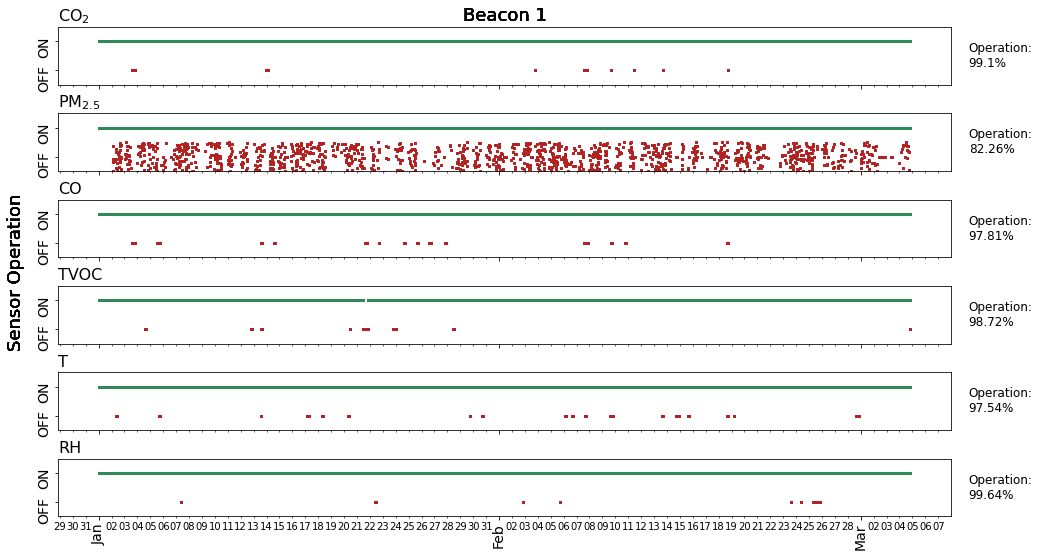

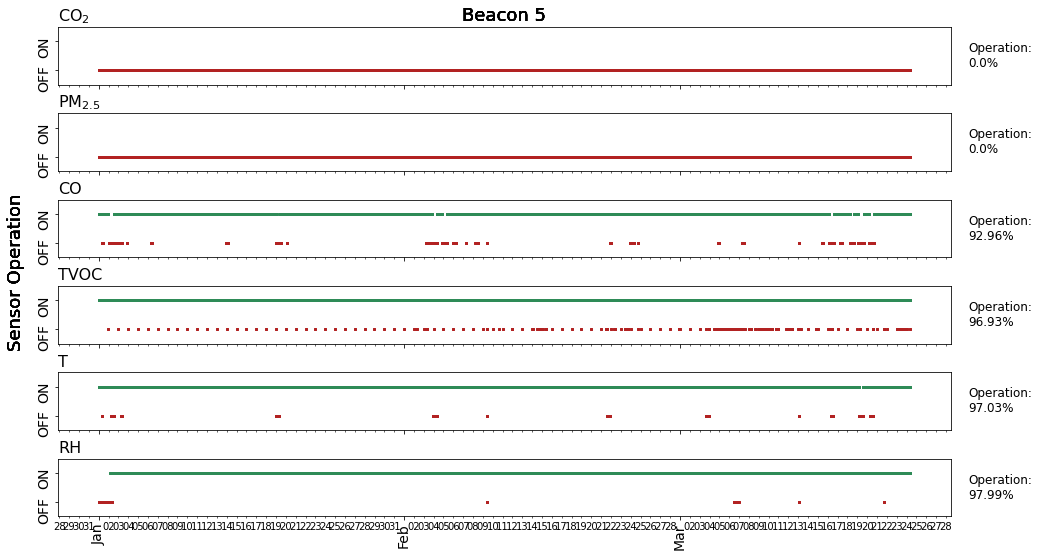

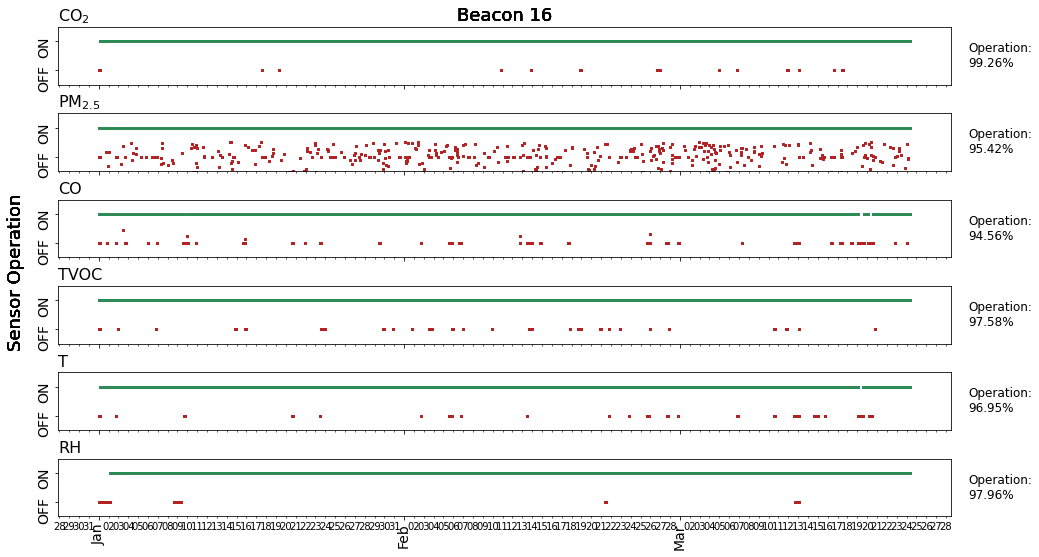

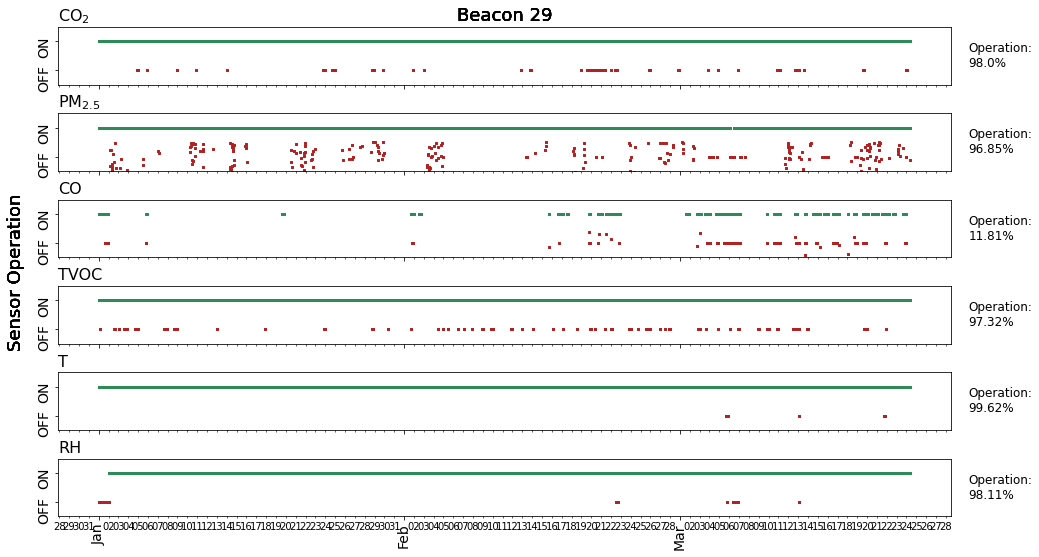

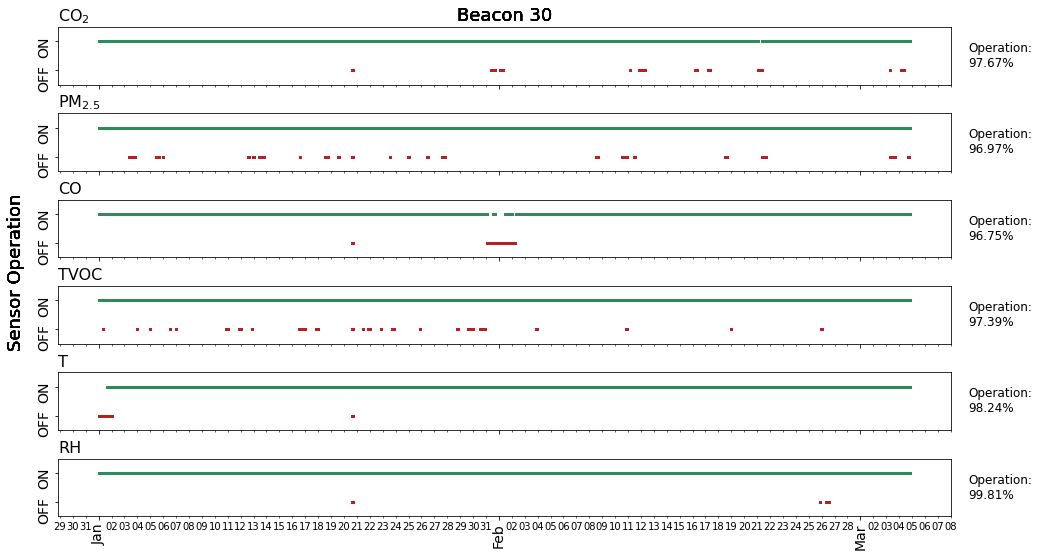

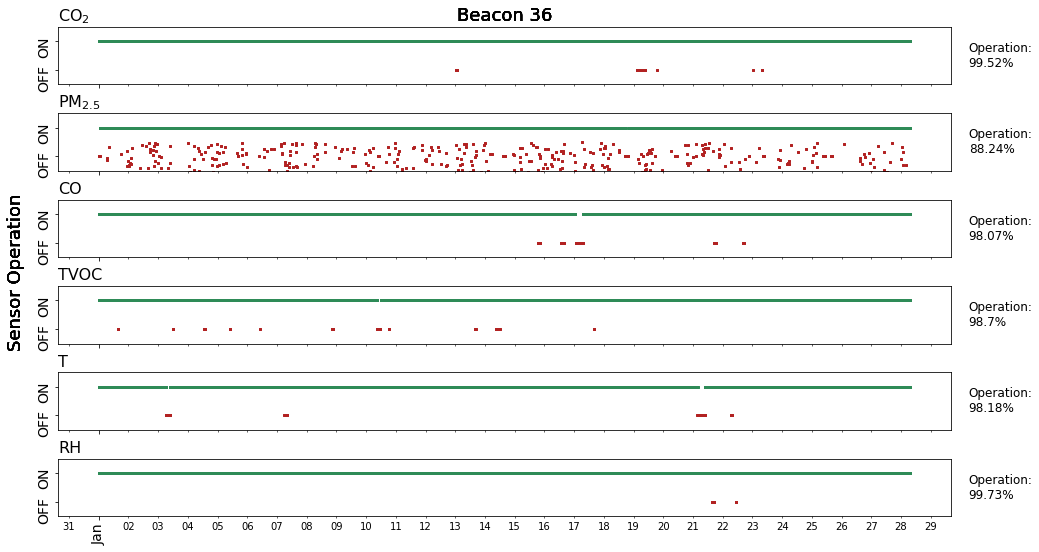

In [11]:
beacon.plot_sensor_operation()

<div class="alert alert-block alert-warning">
 
Beacon 30 seems to have periods where data are missing at every other timestamp and merits a closer look.
    
</div>

### Beacon 30
These are some of the periods where Beacon 30 exhibits extensive missing data:
* 01/01/22 - 01/02/22
* 01/09/22 - 01/11/22

These periods are also consistent across all sensors. However, the PM sensors seems to go offline a bit more often during these periods:
* 01/05/22 - 01/06/22
* 01/13/22 12:00 - 01/14/22

<div class="alert alert-block alert-warning">
 
On closer inspection, it seems there is a small timing issue when logging the measurements which is more pronounced on Beacon 30 compared to the others. It seems the measurements are not made on every minute exactly. Therefore, there are instances when the a measurement appears within the same minute i.e. 8:00 and 8:57. Then new data are logged at every minute from that _last_ timestamp for a certain amount of time before the software corrects itself. However, when it corrects, the next minute is skipped - for example:
    
* 4:57
* 5:57
* 6:57
* 8:00
    
This causes us to miss minute 7:00 when we do the resample since 6:57 -> 6:00 and 8:00 - > 8:00. The solution would be to round each timestamp to the nearest minute and then `reindex` but rounding datetime instances is not as straight-forward as it should be...
    
</div>

#### Temperature

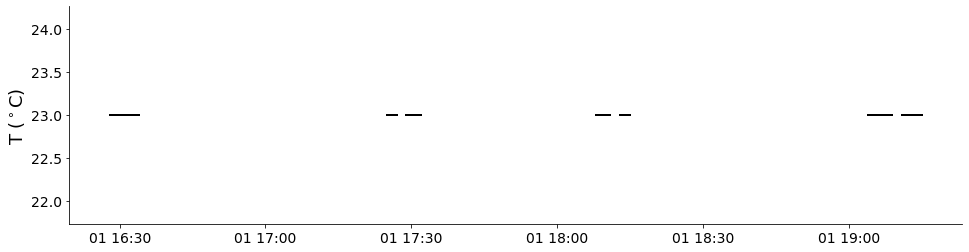

In [7]:
beacon.plot_beacon_ts(30,"temperature_c",datetime(2022,1,1),datetime(2022,1,2))

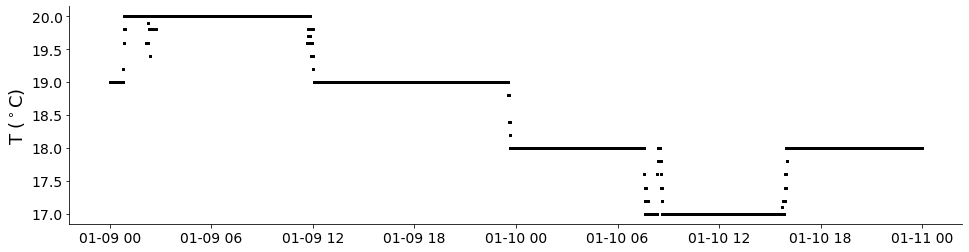

In [8]:
beacon.plot_beacon_ts(30,"temperature_c",datetime(2022,1,9),datetime(2022,1,11),scatter=True)

#### PM

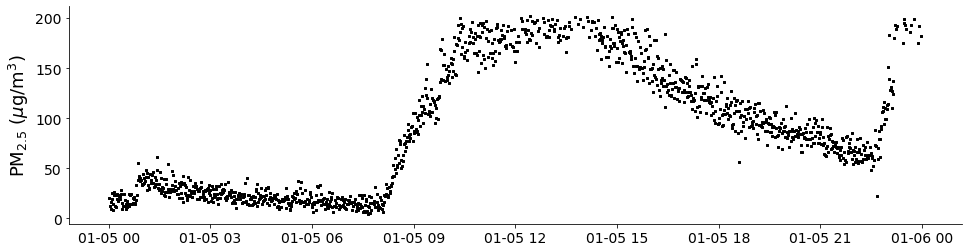

In [9]:
beacon.plot_beacon_ts(30,"pm2p5_mass",datetime(2022,1,5),datetime(2022,1,6),scatter=True)

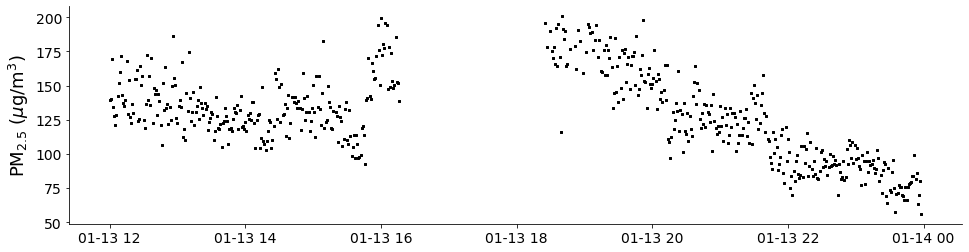

In [10]:
beacon.plot_beacon_ts(30,"pm2p5_mass",datetime(2022,1,13,12),datetime(2022,1,14),scatter=True)

---

<a id="aggregated"></a>

# Aggregated Summary
Starting with a summary of all the available data

## Statistics

In [12]:
beacon.get_summary_stats()

\begin{tabular}{lrrrrrrr}
\toprule
{} &       n &     avg &    med &    min &    25\% &     75\% &     95\% \\
\midrule
co2           &   90254 &  1264.9 &  952.1 &  393.8 &  748.4 &  1613.6 &  2792.8 \\
pm2p5\_mass    &   89424 &    23.1 &    8.8 &   -6.2 &    4.0 &    25.1 &    99.8 \\
co            &  110456 &     5.9 &    7.0 &  -11.3 &    4.7 &     8.7 &    19.6 \\
tvoc          &  112509 &   105.3 &   21.3 &    0.0 &    0.9 &   122.0 &   429.3 \\
temperature\_c &  112830 &    23.4 &   24.0 &   15.0 &   22.0 &    25.5 &    26.5 \\
rh            &  113721 &    42.3 &   40.0 &   16.1 &   30.5 &    50.0 &    71.8 \\
\bottomrule
\end{tabular}



,n,avg,med,min,25%,75%,95%
co2,90254,1264.9,952.1,393.8,748.4,1613.6,2792.8
pm2p5_mass,89424,23.1,8.8,-6.2,4.0,25.1,99.8
co,110456,5.9,7.0,-11.3,4.7,8.7,19.6
tvoc,112509,105.3,21.3,0.0,0.9,122.0,429.3
temperature_c,112830,23.4,24.0,15.0,22.0,25.5,26.5
rh,113721,42.3,40.0,16.1,30.5,50.0,71.8


## Distributions

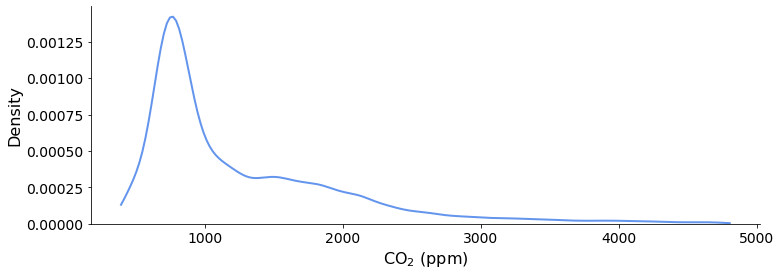

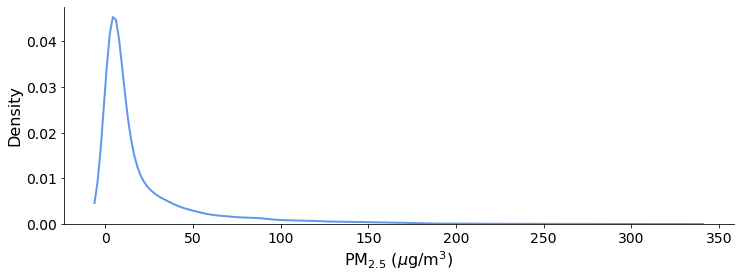

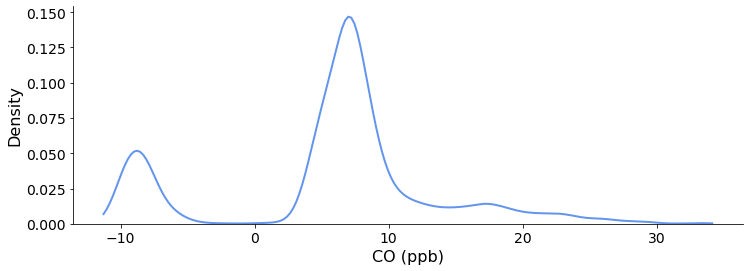

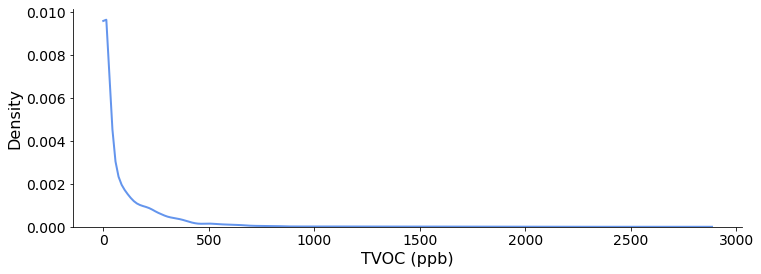

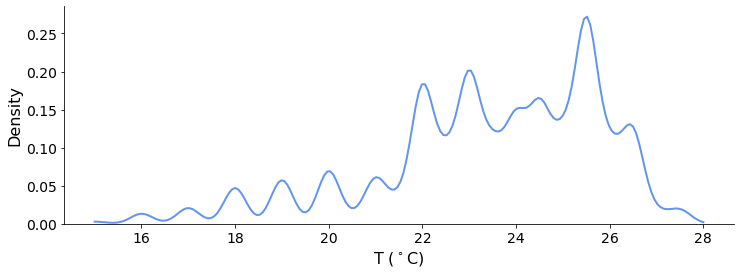

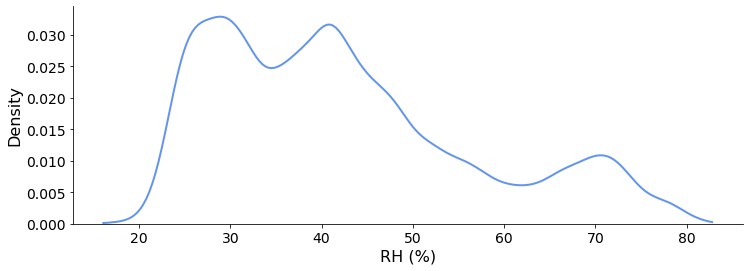

In [15]:
beacon.plot_distributions(individual_traces=False)

For the most part, the beacons appear to be behaving normally with measurements within normal ranges with the occasional extreme measurements consistent with activity like cooking and cleaning.

<div class="alert alert-block alert-warning">
 
**Carbon Monoxide**: There are some troubling _negative_ values likely on one beacon.
    
**PM**: Looks like there are also a small handful of negative values here.
    
**Temperature**: Some of the beacons are reading _very_ low which is a consequence of their calibration. Beacon 1 has a $b = -33$ and has the worst performance while Beacons 30 and 36 have $b \approx -15$. Beacon 16 is the most reasonable at $b = -5$ and therefore has the most likely measurements. 
    
</div>

### Individual Traces
Inspecting some of the parameters based on the aggregate distributions.

#### Temperature

Beacon 1


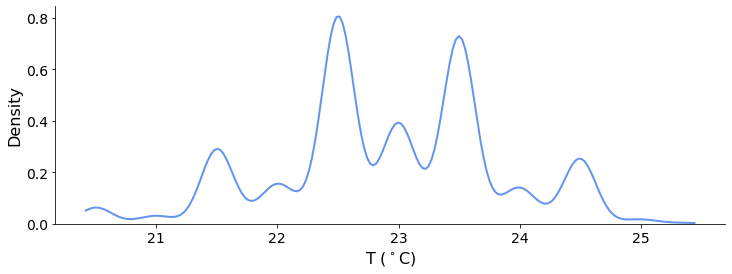

Beacon 5


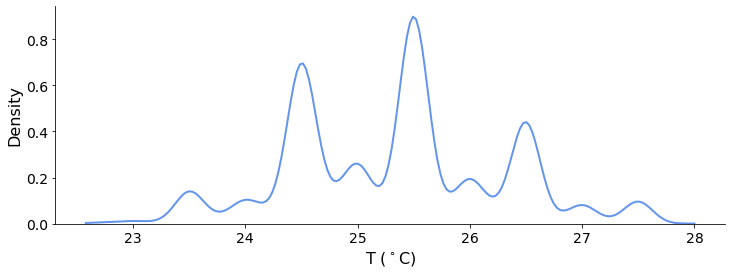

Beacon 16


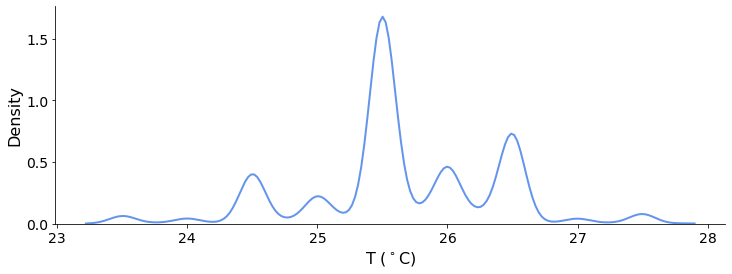

Beacon 29


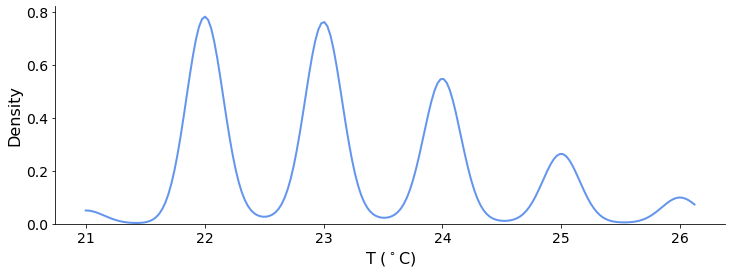

Beacon 30


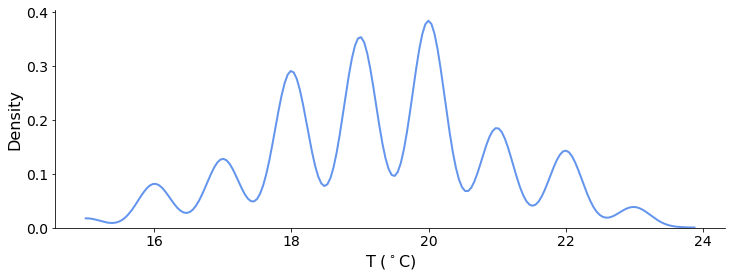

Beacon 36


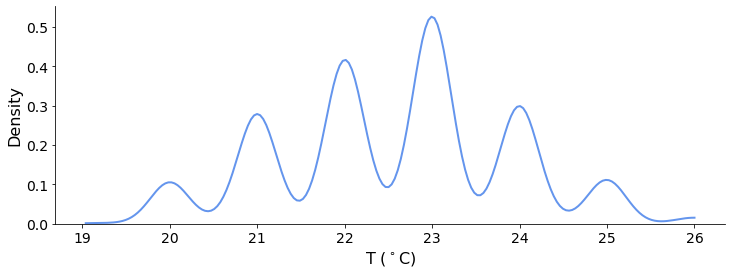

In [16]:
for bb in beacon.data["beacon"].unique():
    print(f"Beacon {bb}")
    bb_df = beacon.get_beacon(bb)
    beacon.plot_distributions(data=bb_df,params=["temperature_c"])

<div class="alert alert-block alert-success">
 
Using the raw temperature values highlight more reasonable measurements. Perhaps the fact that we are measuring during the heating season means the calibration models are not appropriate.
    
</div>

#### Carbon Monoxide

Beacon 1


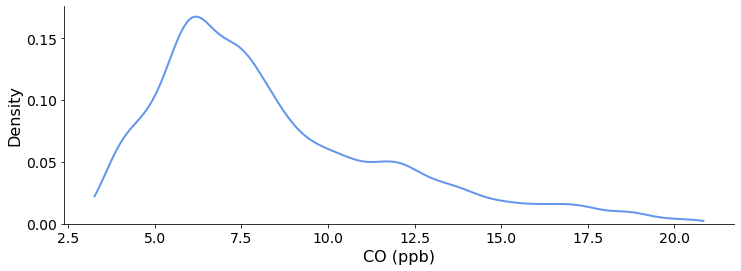

Beacon 5


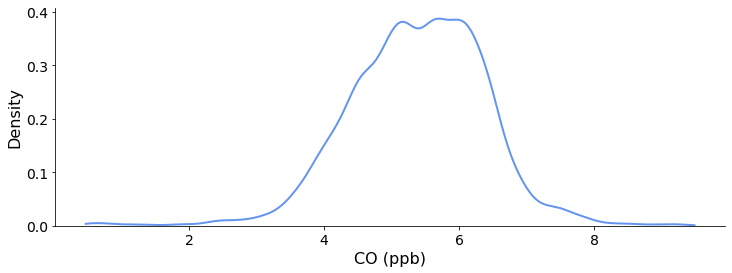

Beacon 16


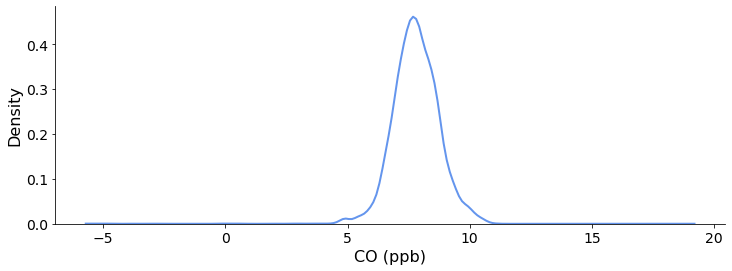

Beacon 29


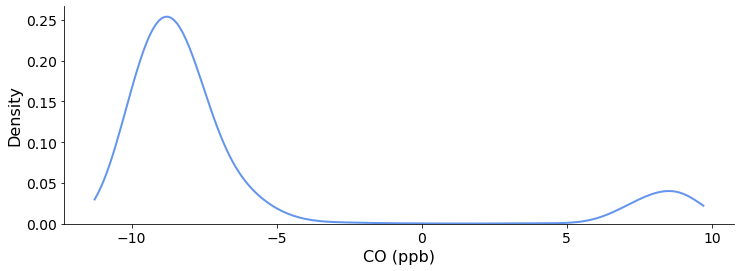

Beacon 30


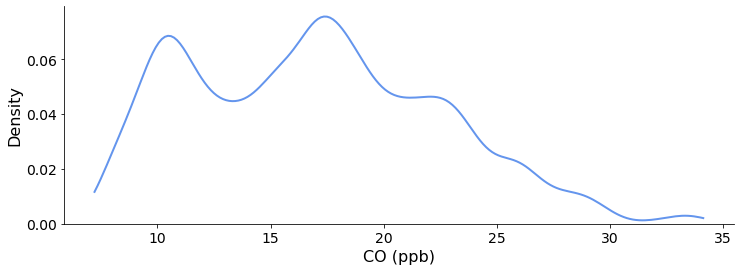

Beacon 36


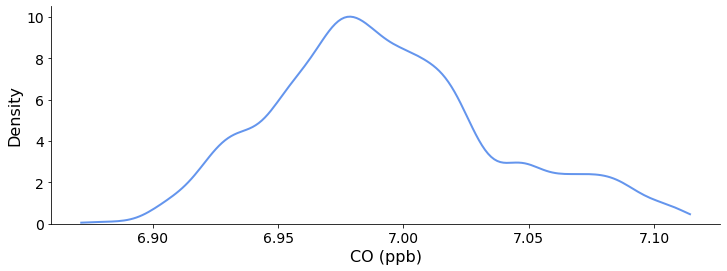

In [22]:
for bb in beacon.data["beacon"].unique():
    data_bb = beacon.data[beacon.data["beacon"] == bb]
    print("Beacon", bb )
    beacon.plot_distributions(data=data_bb,params=["co"])

<div class="alert alert-block alert-danger">
 
Beacon 29 is the culprit although 16 also has some a few instances of negative values likely from when the device is first powered on.
    
</div>

##### Beacon 16

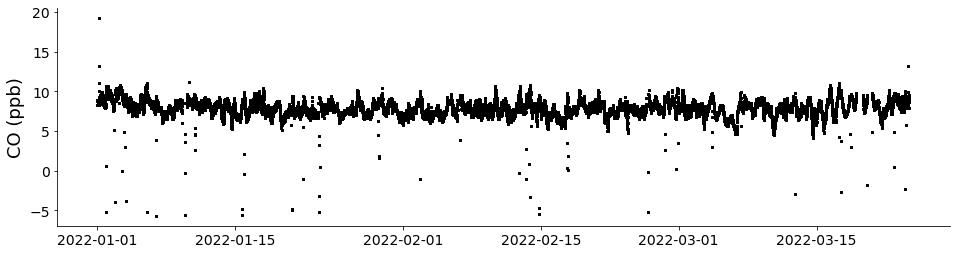

In [27]:
beacon.plot_beacon_ts(16,"co",scatter=True)

<div class="alert alert-block alert-warning">
 
I was wrong: the CO sensor seems to periodically cycle toward negative values usually stopping around -5 although it doesn't seem like a consistent stopping value. Removing these values is likely to return a "more normal" time series.
    
</div>

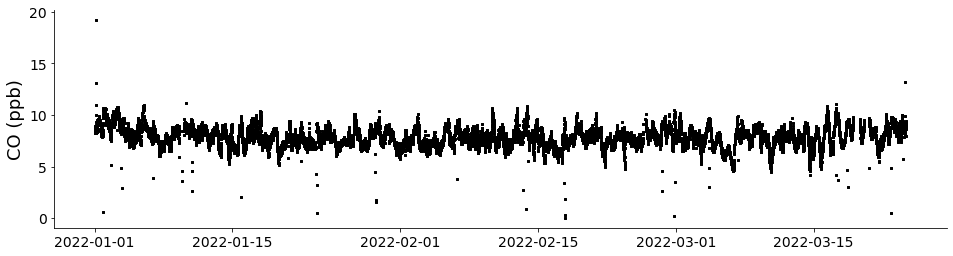

In [28]:
data_16 = beacon.data[beacon.data["beacon"] == 16]
data_16_co = data_16[data_16["co"] > 0]
beacon.plot_beacon_ts(16,"co",data=data_16_co,scatter=True)

<div class="alert alert-block alert-warning">
 
Better, but there are still values that cycle low that we weren't able to truncate.
    
</div>

##### Beacon 29

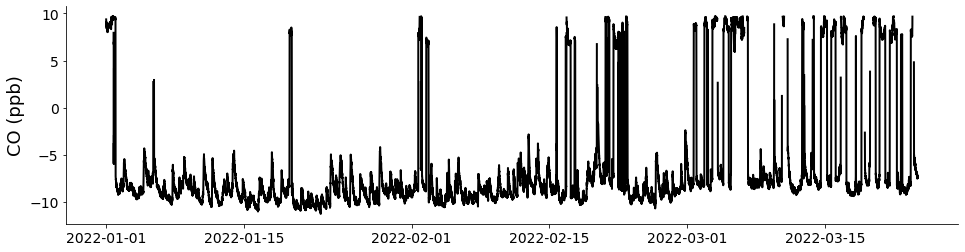

In [23]:
beacon.plot_beacon_ts(29,"co")

<div class="alert alert-block alert-warning">
 
Interestingly this Beacon seems to have the _opposite_ behavior cycling toward _positive_ values. Disregarding these points, the trend in the data seems reasonable. The poor performance also seems to get worse the later in the study.
    
</div>

My only other thought was perhaps this Beacon wasn't calibrated, but that isn't true. Perhaps post-calibrating is more appropriate? 

##### Beacon 30
No negative values, but the concentrations are quite high.

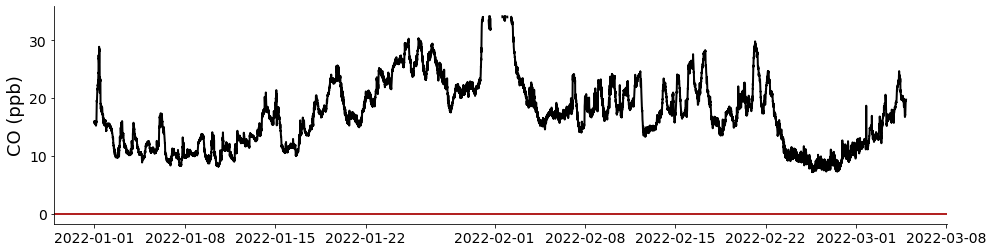

In [44]:
beacon.plot_beacon_ts(30,"co")

We have information on whether participants had gas stoves or not so _hopefully_ this family is one of them.

#### PM

Beacon 1


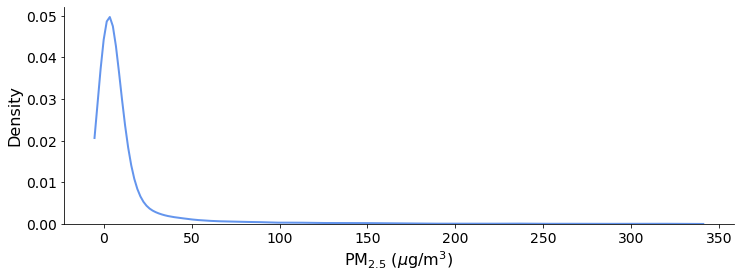

Beacon 5


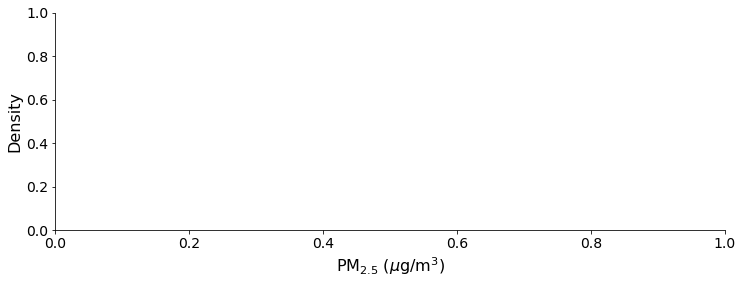

Beacon 16


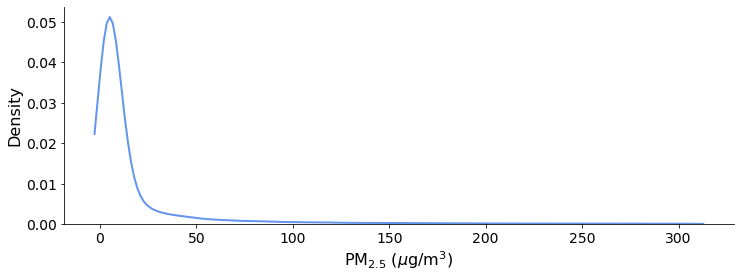

Beacon 29


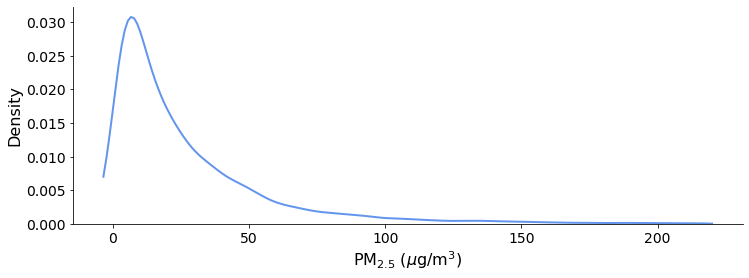

Beacon 30


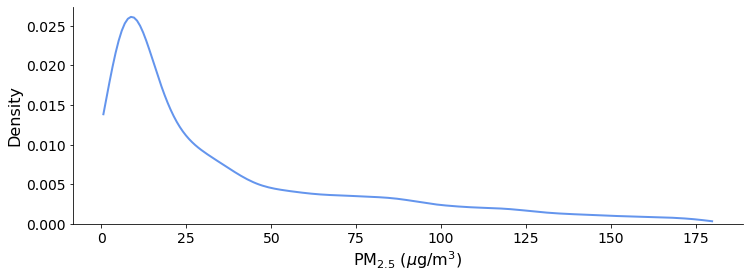

Beacon 36


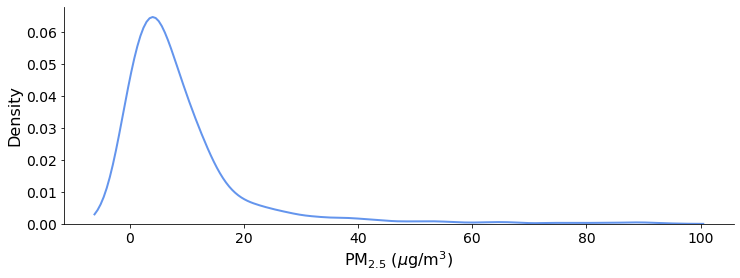

In [29]:
for bb in beacon.data["beacon"].unique():
    data_bb = beacon.data[beacon.data["beacon"] == bb]
    print("Beacon", bb )
    beacon.plot_distributions(data=data_bb,params=["pm2p5_mass"])

<div class="alert alert-block alert-warning">
 
I think all the Beacons have a small percentage of negative values, but it is easiest to see on Device 36 since the overall values tend to be lower.
    
</div>

##### Beacon 36

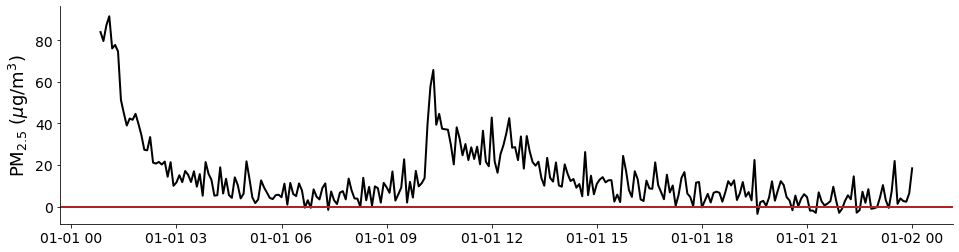

In [41]:
beacon.plot_beacon_ts(36,"pm2p5_mass",scatter=False,start_time=datetime(2022,1,1),end_time=datetime(2022,1,2))

<div class="alert alert-block alert-info">
 
Looks like just a natural flucuation in measured values but looks like a averaged curve would produce values above 0.
    
</div>

here


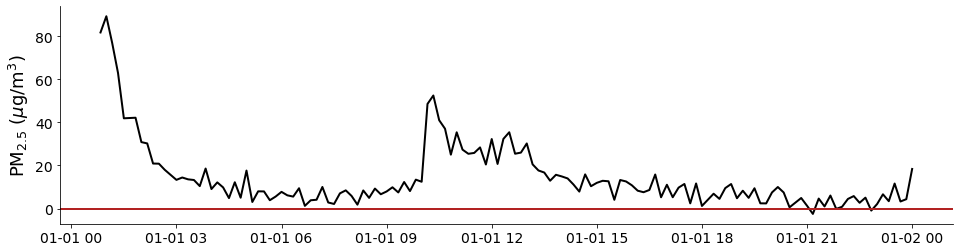

In [40]:
beacon.plot_beacon_ts(36,"pm2p5_mass",scatter=False,
                      start_time=datetime(2022,1,1),end_time=datetime(2022,1,2),
                      resample_rate=10)

<div class="alert alert-block alert-success">
 
Much fewer instances of negative values and the fluctuations seem to wane. 
    
Perhaps a moving average is more appropriate - something to consider for the future!
    
</div>

---

<a id="pt-based"></a>

# Participant-Based Summary

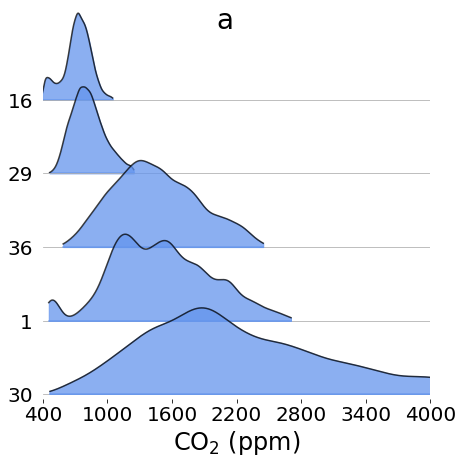

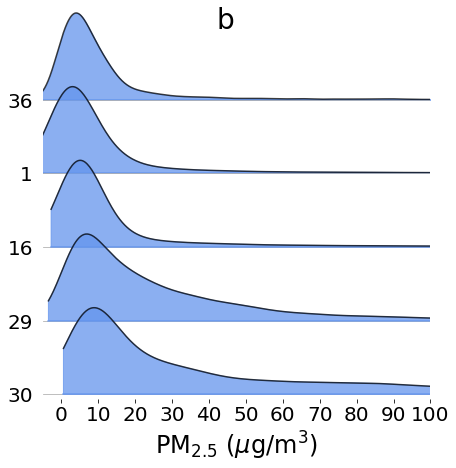

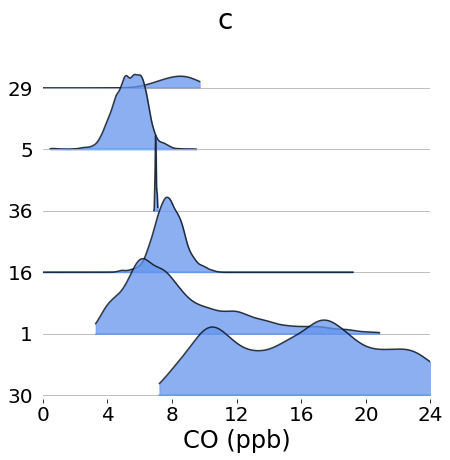

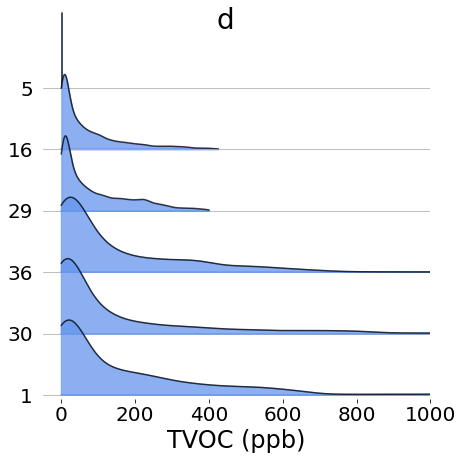

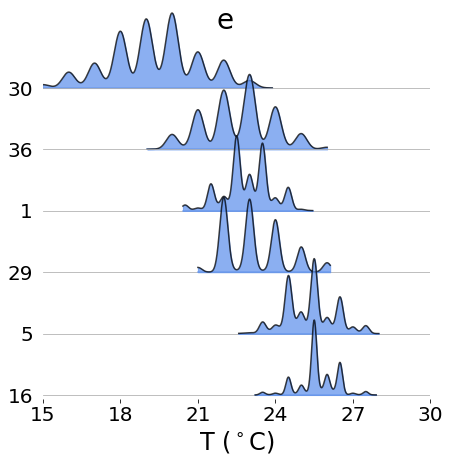

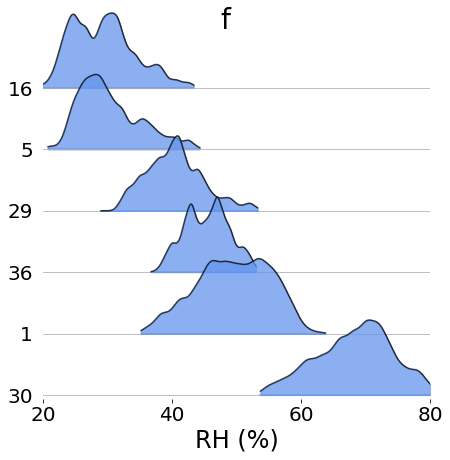

In [45]:
beacon.plot_beacon_joyplots_by_stat(params=["co2","pm2p5_mass","co","tvoc","temperature_c","rh"],
        limits=[[400,4000],[-5,100],[0,24],[-50,1000],[15,30],[20,80]],
        ticks=[range(400,4200,600),range(0,110,10),range(0,28,4),range(0,1200,200),range(15,33,3),range(20,100,20)])

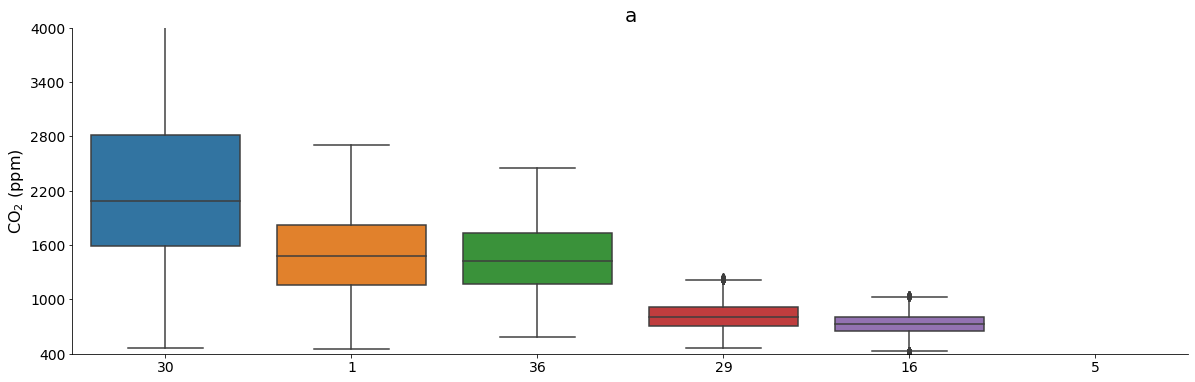

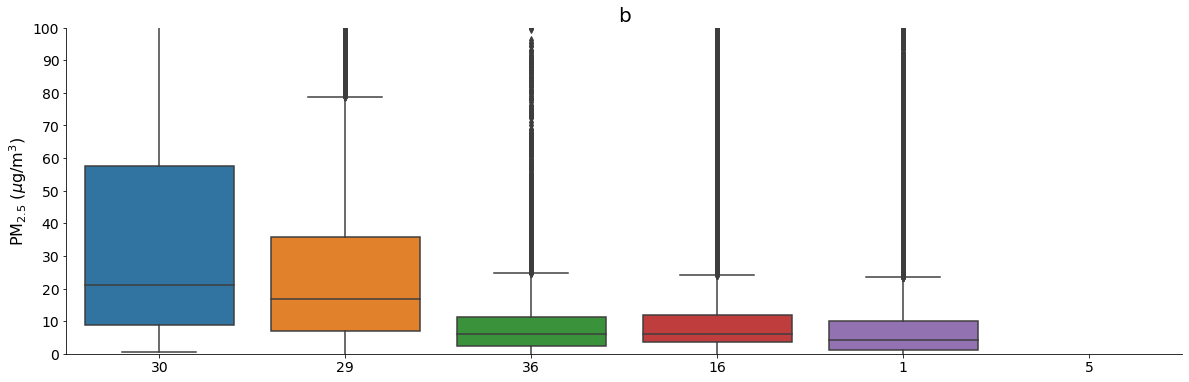

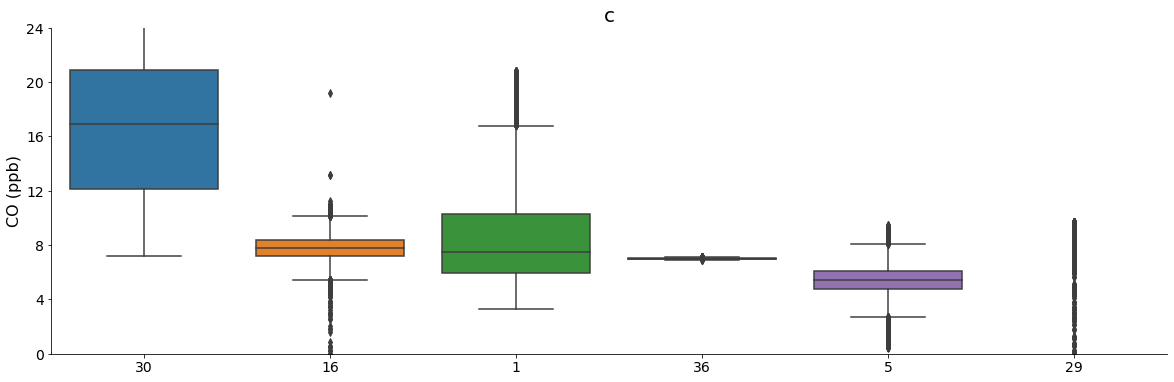

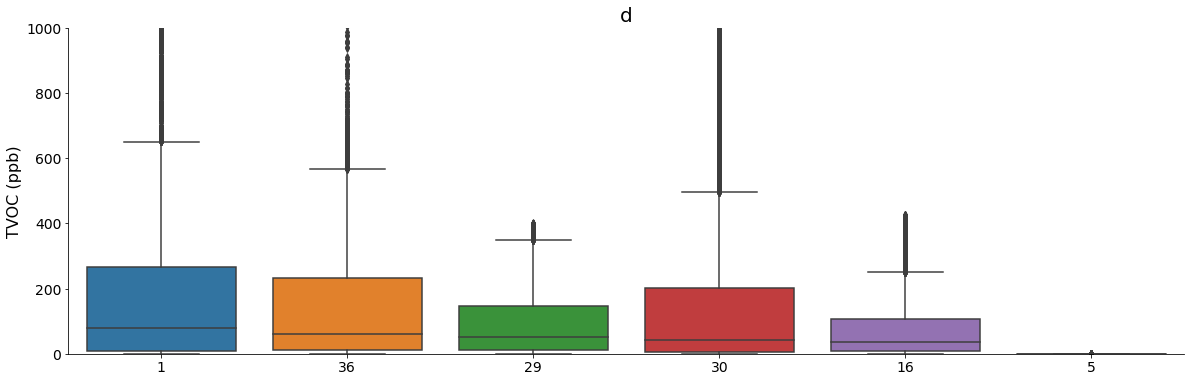

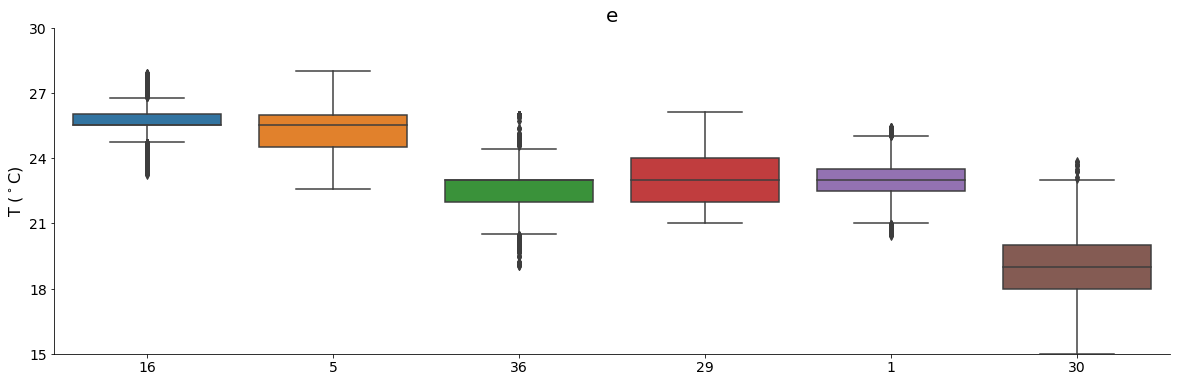

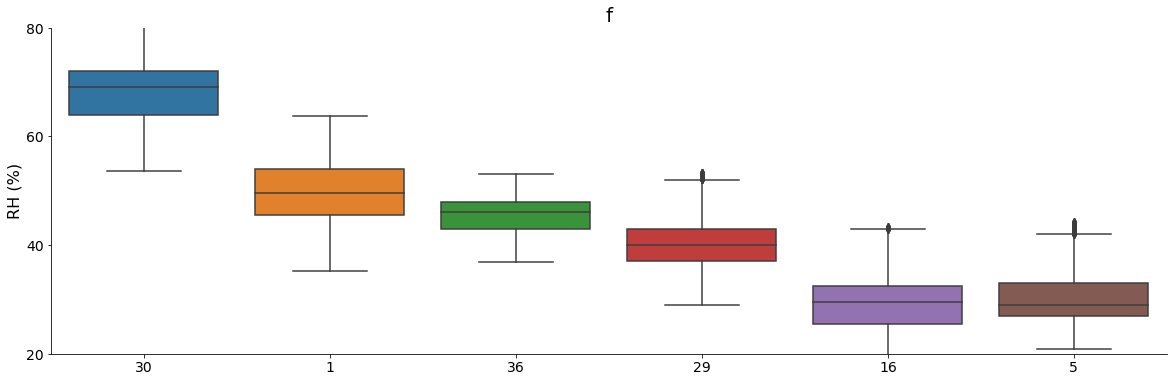

In [18]:
beacon.plot_beacon_boxplots_by_stat(params=["co2","pm2p5_mass","co","tvoc","temperature_c","rh"],
        limits=[[400,4000],[0,100],[0,24],[0,1000],[15,30],[20,80]],
        ticks=[range(400,4200,600),range(0,110,10),range(0,28,4),range(0,1200,200),range(15,33,3),range(20,100,20)])

Beacon 1


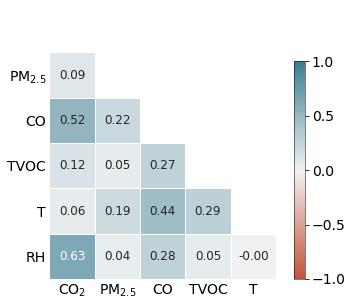

Beacon 5


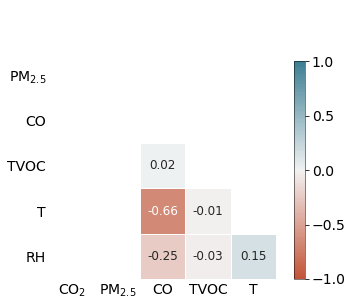

Beacon 16


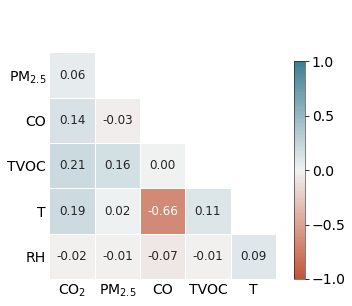

Beacon 29


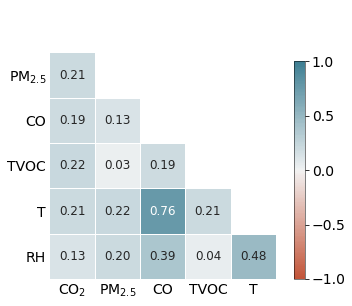

Beacon 30


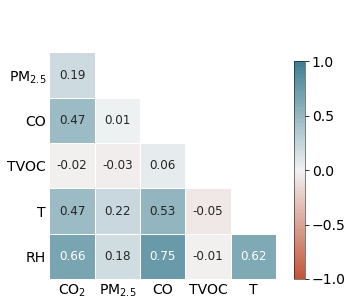

Beacon 36


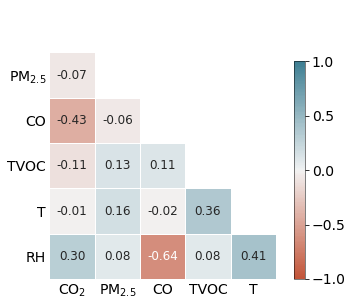

In [19]:
for bb in beacon.data["beacon"].unique():
    print(f"Beacon {bb}")
    beacon.plot_correlation_matrix(data=beacon.get_beacon(bb))

There are some correlations, most notably:
* `rh` and `co2`: This positive association appears in Beacons 1 and 30
* `co` and `co2`: This weaker, but positive association appears in Beacons 1 and 30 again
* `rh` and `co`: There are two opposite associations present in Beacons 30 (+) and 36 (-)

---